In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score

In [ ]:
from sklearn import set_config
set_config(transform_output="pandas")

In [ ]:
url = "https://drive.google.com/file/d/1ffukiBPGnkVLLRwLccs2i6qO590w_M9s/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
audio_df = pd.read_csv(path)

In [ ]:
audio_df.shape

(5235, 18)

In [ ]:
#index song_name and artist, drop some columns
audio_df.drop(["html", "id","mode", "time_signature"], axis=1, inplace=True)
audio_df.drop(["duration_ms", "key", "type"], axis=1, inplace=True)
audio_df = audio_df.set_index(["name", "artist"])

In [ ]:
# scaling the data (preprocessing)
audio_norm = MinMaxScaler().fit_transform(audio_df)
pd.DataFrame(audio_norm).head()

,,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
name,artist,,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.680455,0.2590,0.763897,0.076797,0.696787,0.000060,0.987842,0.310660,0.515800
Saudade De Bahia,Antônio Carlos Jobim,0.767322,0.3990,0.771967,0.037691,0.217871,0.000002,0.108409,0.703553,0.584322
"Canta Canta, Minha Gente",Martinho Da Vila,0.880041,0.7300,0.798018,0.377996,0.454819,0.000064,0.125633,0.918782,0.437862
Mulher Eu Sei,Chico César,0.729059,0.0502,0.682811,0.051307,0.882530,0.000041,0.391084,0.531980,0.499098
Rosa Morena,Kurt Elling,0.673216,0.1190,0.655228,0.041394,0.919679,0.000348,0.105370,0.408122,0.565171


In [ ]:
# Clustering Algorithm - (build the model)
audio_kmeans = KMeans(n_clusters=48, n_init=10, random_state=213).fit(audio_norm)

audio_kmeans

KMeans(n_clusters=48, n_init=10, random_state=213)

In [ ]:
columns = ['danceability', 'energy', 'loudness', 'speechiness','acousticness','instrumentalness','liveness','valence','tempo']

centroids = pd.DataFrame(audio_kmeans.cluster_centers_)
centroids.columns = columns
centroids.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.656841,0.486108,0.811031,0.064797,0.301850,0.019982,0.152004,0.720301,0.518793
1,0.267773,0.612809,0.767560,0.056283,0.048610,0.807387,0.157490,0.223210,0.527968
2,0.627660,0.412789,0.766672,0.066317,0.613824,0.795912,0.131504,0.310601,0.568262
3,0.320832,0.917102,0.875131,0.117390,0.016462,0.055079,0.415320,0.216481,0.587756
4,0.240896,0.103904,0.626785,0.044178,0.889409,0.623912,0.145379,0.095894,0.397290


In [ ]:
playlist_df =centroids

In [ ]:
plot_data = pd.DataFrame(audio_norm, columns = columns)
plot_data['cluster'] = audio_kmeans.predict(audio_norm)  #peng_kmeans.labels_
plot_data.sample()

,,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
name,artist,,,,,,,,,,
Agua De Beber,Sophie Milman,0.682523,0.759,0.83874,0.047603,0.243976,0.002305,0.076596,0.71066,0.441502,25


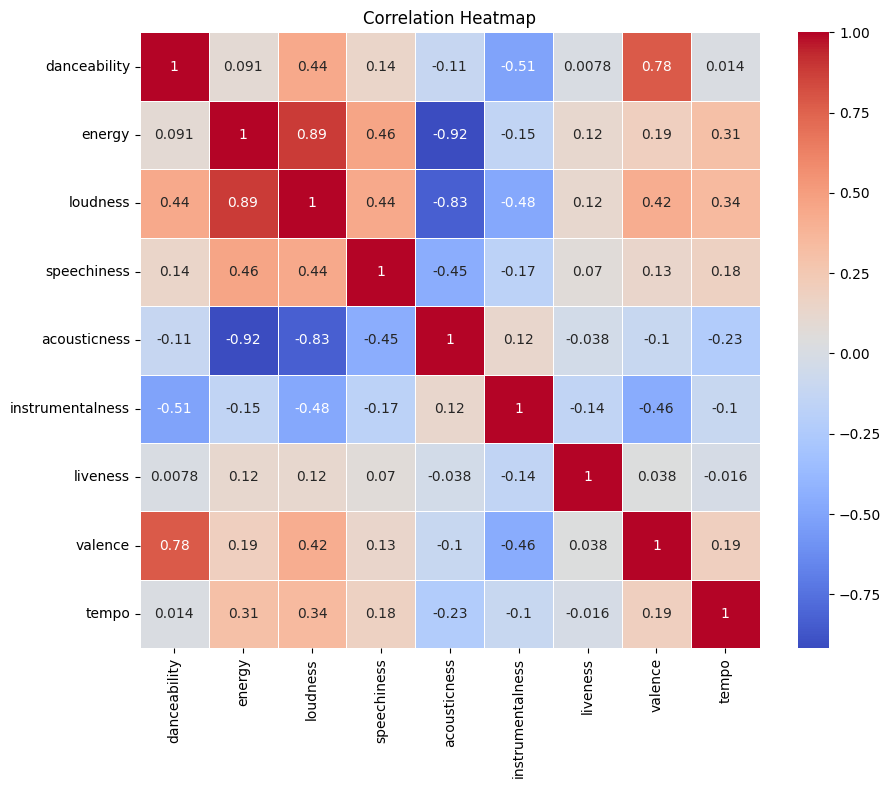

In [ ]:
# Create a correlation matrix for the DataFrame
correlation_matrix = centroids.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
#use inertia
audio_kmeans.inertia_

342.04494035713844

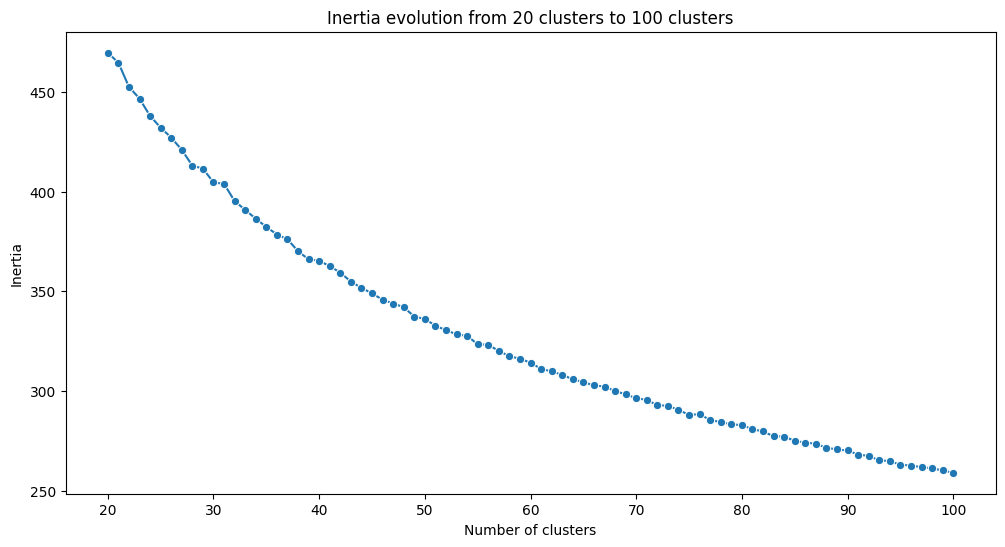

In [ ]:
max_k = 101
inertia = []

for k in range(20, max_k):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=213)
    kmeans.fit(audio_norm)
    inertia.append(kmeans.inertia_)

# Plot the inertia
fig, ax = plt.subplots(figsize=(12, 6))
plt.title(f'Inertia evolution from 20 clusters to {max_k - 1} clusters')
sns.lineplot(x=range(20, max_k), y=inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
## we are choosing 41 clusters
kmeans_with_elbow = KMeans(n_clusters=42, n_init = 10, random_state=213).fit(audio_norm)

In [ ]:
#Silhouette Score
silhouette_score(audio_norm, audio_kmeans.labels_)

0.14439831916223064

In [ ]:
max_k = 101
sil_score = []

for k in range(20, max_k):
    labels = KMeans(n_clusters=k, n_init= 10, random_state=213).fit(audio_norm).labels_
    current_silhoutte_score = silhouette_score(audio_norm, labels)
    sil_score.append(current_silhoutte_score)

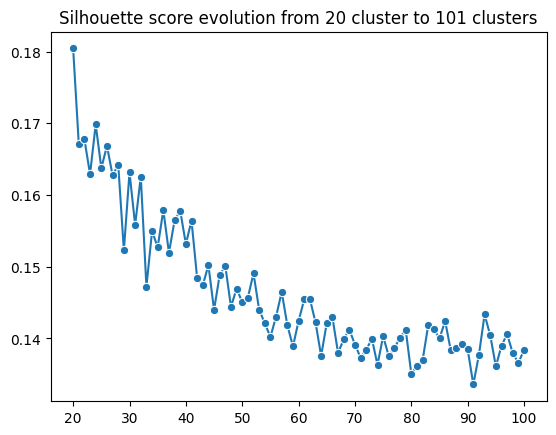

In [ ]:
#plotting the results
plt.title(f'Silhouette score evolution from 20 cluster to {max_k} clusters')
sns.lineplot(x=range(20, max_k), y=sil_score, marker='o')
plt.show()

In [ ]:
#Silhouette_samples  / Knives chart
# Prepare the features for clustering
features = audio_df[['danceability', 'energy', 'loudness', 'speechiness','acousticness','instrumentalness','liveness','valence','tempo']]
scaled_features = MinMaxScaler().fit_transform(features)

In [ ]:
# Define a function to calculate k-means clustering and return silhouette score for different k values
def get_silhouette_score(k, features):
    kmeans = KMeans(n_clusters=k, random_state=213, n_init = 10).fit(features)
    labels = kmeans.labels_
    score = silhouette_score(features, labels)
    return score

In [ ]:
# Calculate silhouette scores for different k values
k_values = list(range(20, 101))
silhouette_scores = [get_silhouette_score(k, scaled_features) for k in k_values]

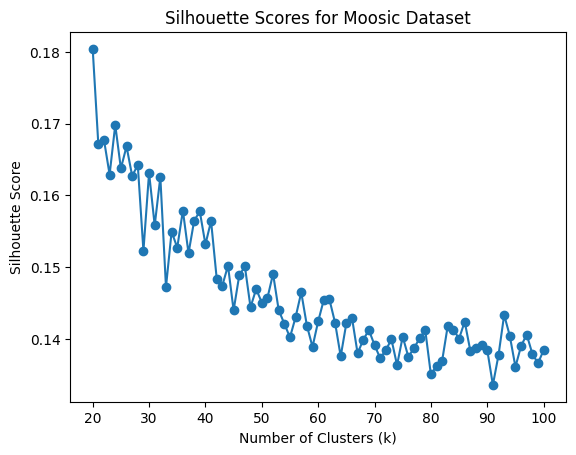

In [ ]:
# Plot the silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Moosic Dataset")
plt.show()

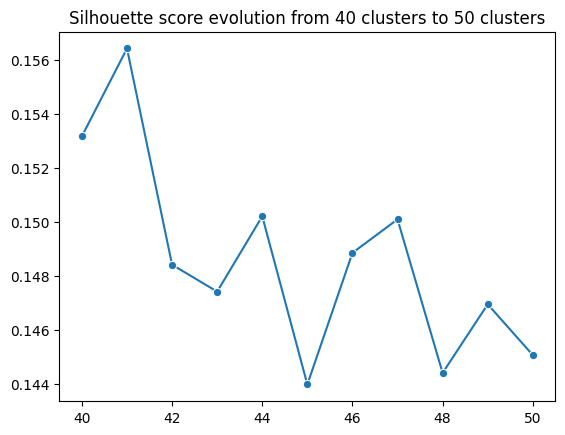

In [ ]:
min_k = 40
max_k = 51
sil_score = []

for k in range(min_k, max_k):
    labels = KMeans(n_clusters=k, n_init= 10, random_state=213).fit(audio_norm).labels_
    current_silhouette_score = silhouette_score(audio_norm, labels)
    sil_score.append(current_silhouette_score)

#plotting the results
plt.title(f'Silhouette score evolution from {min_k} clusters to {max_k - 1} clusters')
sns.lineplot(x=range(min_k, max_k), y=sil_score, marker='o')
plt.show()

In [ ]:
#Therefore we pick 42 clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


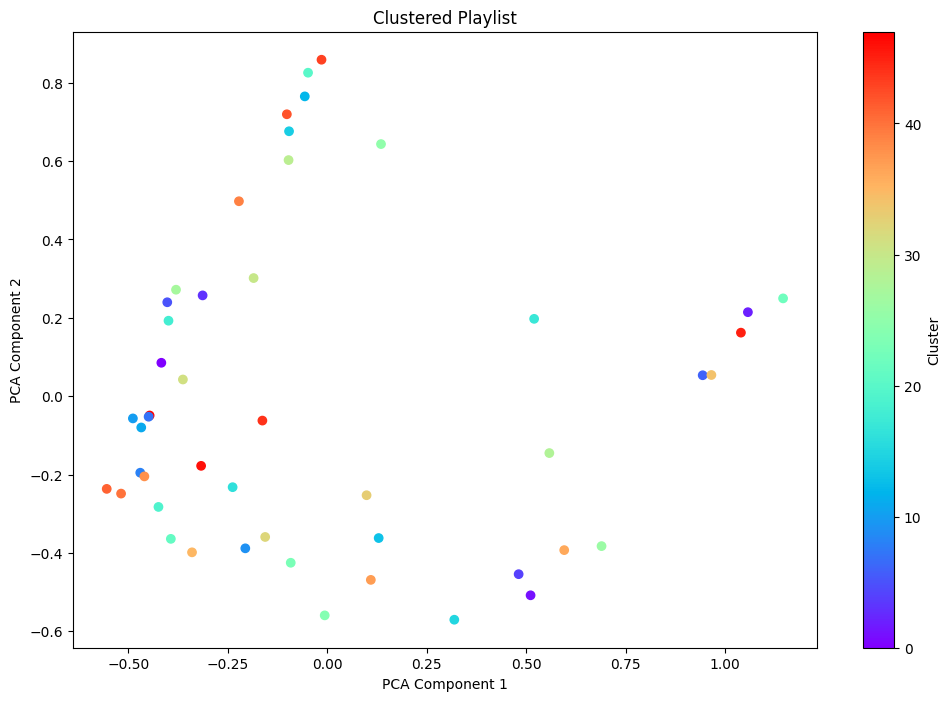

In [ ]:
#To visualize
from sklearn.decomposition import PCA


# Assuming you already have 'playlist_df' and 'number of clusters' defined

# Perform K-Means clustering with random_state=213
kmeans = KMeans(n_clusters=48, random_state=213)
playlist_df['cluster'] = kmeans.fit_predict(playlist_df)

# Reduce the data to 2 dimensions using PCA
pca = PCA(n_components=2)
playlist_df[['pca1', 'pca2']] = pca.fit_transform(playlist_df.iloc[:, :-1])

# Create a scatter plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(playlist_df['pca1'], playlist_df['pca2'], c=playlist_df['cluster'], cmap='rainbow')
plt.title('Clustered Playlist')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(scatter, label='Cluster')
plt.show()
